## Try to get Twitter data directly

In [16]:
import tweepy

In [58]:
consumer_key = "5FlPkFBizkmYtyvfql31ie6Ol"
consumer_secret = "E0yhor3Fvy8IRlR8iPRIzU6gQx6tS0fjyhN2jji1JTlDxMVAnZ"

access_token = "1696734777490173952-CUKOCkUSIC9HG9yIdrSbqF07woehAi"
access_token_secret = "sxpItHpZuHHQO7rug06mOgeV5RX52QoDrknIrlVxFhIdi"

auth = tweepy.OAuth1UserHandler(
    consumer_key, consumer_secret, access_token, access_token_secret
)

api = tweepy.API(auth)

# If the authentication was successful, this should print the
# screen name / username of the account
print(api.verify_credentials().screen_name)


HaThanhChu96723


https://ieee-dataport.org/open-access/coronavirus-covid-19-tweets-dataset

https://github.com/thepanacealab/covid19_twitter/tree/master

In [21]:
import pandas as pd

df = pd.read_csv('2023_march14_march15.csv', names = ['tweetid', 'sentiment'])

df.head()

,tweetid,sentiment
0,1635437012634181633,0.000000
1,1635439537831698432,0.142857
2,1635455886867980288,0.000000
3,1635458402846375936,0.000000
4,1635461005395337216,0.000000


In [22]:
df1 = pd.read_csv('corona_tweets_18.csv', names = ['tweetid', 'sentiment'])

df1.head()

,tweetid,sentiment
0,1246696937471918080,0.0
1,1246696937895665664,0.0
2,1246696938310742016,0.0
3,1246696939116060673,0.5
4,1246696939112013825,0.0


In [25]:
df2 = pd.read_excel('coronatweetids2.xlsx')

df2.head()

,tweet_id
0,1242953451295748096
1,1242953455418740736
2,1242953456387649536
3,1242953461118799872
4,1242953464080039936


## Try to hydrate old Twitter ID datasets

In [12]:
dataframe=df1['tweetid']

dataframe

dataframe.to_csv("ready_corona_tweets_18.csv", index=False, header=None)

In [29]:
#$ twarc configure

from twarc import Twarc

consumer_key="5FlPkFBizkmYtyvfql31ie6Ol"
consumer_secret="E0yhor3Fvy8IRlR8iPRIzU6gQx6tS0fjyhN2jji1JTlDxMVAnZ"
access_token="1696734777490173952-CUKOCkUSIC9HG9yIdrSbqF07woehAi"
access_token_secret="sxpItHpZuHHQO7rug06mOgeV5RX52QoDrknIrlVxFhIdi"

t = Twarc(consumer_key, consumer_secret, access_token, access_token_secret)

for tweet in t.hydrate(open('coronatweetids2.xlsx')):
    
    #print(tweet['text'])
    print(tweet['id'])

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 15: character maps to <undefined>

In [34]:
from IPython.display import clear_output
!pip install twarc #Twarc
!pip install tweepy # Tweepy 3.8.0
!pip install argparse #Argparse 3.2
!pip install xtract #Xtract 0.1 a3
!pip install wget #Wget 3.2
clear_output()

In [36]:
import gzip
import shutil
import os
import wget
import csv
import linecache
from shutil import copyfile
import ipywidgets as widgets
import numpy as np
import pandas as pd

dataset_URL = "https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-01-20/2021-01-20_clean-dataset.tsv.gz?raw=true" #@param {type:"string"}


#Downloads the dataset (compressed in a GZ format)
#!wget dataset_URL -O clean-dataset.tsv.gz
wget.download(dataset_URL, out='clean-dataset.tsv.gz')

#Unzips the dataset and gets the TSV dataset
with gzip.open('clean-dataset.tsv.gz', 'rb') as f_in:
    with open('clean-dataset.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

#Deletes the compressed GZ file
os.unlink("clean-dataset.tsv.gz")

#Gets all possible languages from the dataset
df = pd.read_csv('clean-dataset.tsv',sep="\t")
lang_list = df.lang.unique()
lang_list= sorted(np.append(lang_list,'all'))
lang_picker = widgets.Dropdown(options=lang_list, value="all")
lang_picker

100% [..........................................................................] 4168582 / 4168582

Dropdown(options=('all', 'am', 'ar', 'bg', 'bn', 'bo', 'ca', 'ckb', 'cs', 'cy', 'da', 'de', 'dv', 'el', 'en', …

In [38]:
filtered_language = lang_picker.value

#If no language specified, it will get all records from the dataset
if filtered_language == "":
  copyfile('clean-dataset.tsv', 'clean-dataset-filtered.tsv')

#If language specified, it will create another tsv file with the filtered records
else:
  filtered_tw = list()
  current_line = 1
  with open("clean-dataset.tsv") as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter="\t")

    if current_line == 1:
      filtered_tw.append(linecache.getline("clean-dataset.tsv", current_line))

      for line in tsvreader:
        if line[3] == filtered_language:
          filtered_tw.append(linecache.getline("clean-dataset.tsv", current_line))
        current_line += 1

  print('\033[1mShowing first 5 tweets from the filtered dataset\033[0m')
  print(filtered_tw[1:(6 if len(filtered_tw) > 6 else len(filtered_tw))])

  with open('clean-dataset-filtered.tsv', 'w') as f_output:
      for item in filtered_tw:
          f_output.write(item)

Showing first 5 tweets from the filtered dataset
['1351757442653294592\t2021-01-20\t05:04:23\ten\tNULL\n', '1351757444033069056\t2021-01-20\t05:04:23\ten\tNULL\n', '1351757446860083202\t2021-01-20\t05:04:24\ten\tNULL\n', '1351757447619375106\t2021-01-20\t05:04:24\ten\tNULL\n', '1351757448219140105\t2021-01-20\t05:04:24\ten\tNULL\n']


In [39]:
import json
import tweepy
from tweepy import OAuthHandler

# Authenticate
CONSUMER_KEY = "5FlPkFBizkmYtyvfql31ie6Ol" #@param {type:"string"}
CONSUMER_SECRET_KEY = "E0yhor3Fvy8IRlR8iPRIzU6gQx6tS0fjyhN2jji1JTlDxMVAnZ" #@param {type:"string"}
ACCESS_TOKEN_KEY = "1696734777490173952-CUKOCkUSIC9HG9yIdrSbqF07woehAi" #@param {type:"string"}
ACCESS_TOKEN_SECRET_KEY = "sxpItHpZuHHQO7rug06mOgeV5RX52QoDrknIrlVxFhIdi" #@param {type:"string"}

#Creates a JSON Files with the API credentials
with open('api_keys.json', 'w') as outfile:
    json.dump({
    "consumer_key":CONSUMER_KEY,
    "consumer_secret":CONSUMER_SECRET_KEY,
    "access_token":ACCESS_TOKEN_KEY,
    "access_token_secret": ACCESS_TOKEN_SECRET_KEY
     }, outfile)

In [46]:
from IPython.display import clear_output

wget.download('https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_acquisition/get_metadata.py', out='get_metadata.py')

#clear_output()

100% [................................................................................] 7205 / 7205

'get_metadata.py'

In [64]:
!python get_metadata.py -i clean-dataset-filtered.tsv -o hydrated_tweets -k api_keys.json

#clear_output()

Your twitter api credentials are valid.
hydrated_tweets
tab seperated file, using \t delimiter
total ids: 201374
metadata collection complete
creating master json file
currently getting 0 - 100
exception: continuing to zip the file
creating ziped master json file
creating minimized json master file
creating CSV version of minimized json master file


In [51]:
from IPython.display import clear_output


wget.download('https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_preprocessing/parse_json_lite.py', out='parse_json_lite.py')

wget.download('https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_preprocessing/fields.py', out='fields.py')


!pip install emot --upgrade
!pip install emoji --upgrade

#clear_output()
     

100% [................................................................................] 5156 / 5156Requirement already satisfied: emot in c:\users\tchu0702\lib\site-packages (3.1)


In [62]:
import random 

no_samples = "1000" #@param {type:"string"}
list_tweets = None

with open("hydrated_tweets_short.json", "r") as myfile:
    list_tweets = list(myfile)

if int(no_samples) > len(list_tweets):
    no_samples = len(list_tweets)

sample = random.sample(list_tweets, int(no_samples))

file = open("sample_data.json", "w")
for i in sample:
  file.write(i)
file.close() #This close() is important

In [63]:
!python parse_json_lite.py sample_data.json p

clear_output()

## Using secondary data from Kaggle

https://www.kaggle.com/datasets/gpreda/covid19-tweets

https://www.kaggle.com/datasets/arunavakrchakraborty/covid19-twitter-dataset?select=Covid-19+Twitter+Dataset+%28Aug-Sep+2020%29.csv

In [3]:
import pandas as pd

df = pd.read_csv('covid19_tweets.csv')

df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


##### Find the most common trigrams in the text columns of the dataset:

In [6]:
from collections import Counter
import nltk
from nltk import ngrams, word_tokenize
import string

nltk.download('punkt')

# Tokenize and clean the text
def tokenize(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return word_tokenize(text)

# Extract trigrams from the tokenized text
def extract_trigrams(tokens):
    return list(ngrams(tokens, 3))

# Tokenize and get trigrams for each tweet
all_trigrams = []
for tweet in df['text']:
    tokens = tokenize(tweet)
    trigrams = extract_trigrams(tokens)
    all_trigrams.extend(trigrams)

# Find most common trigrams
common_trigrams = Counter(all_trigrams).most_common(10)
common_trigrams


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TChu0702\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


[(('it', '’', 's'), 2044),
 (('the', 'covid19', 'pandemic'), 2028),
 (('new', 'covid19', 'cases'), 1657),
 (('due', 'to', 'covid19'), 1446),
 (('don', '’', 't'), 1430),
 (('the', 'spread', 'of'), 1400),
 (('positive', 'for', 'covid19'), 1288),
 (('spread', 'of', 'covid19'), 1277),
 (('last', '24', 'hours'), 1272),
 (('covid19', 'cases', 'in'), 1176)]

#### Calculate Sentiment scores:

In [7]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\TChu0702\AppData\Roaming\nltk_data...


True

In [8]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [9]:
# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores
df['sentiment_score'] = df['text'].apply(lambda tweet: sia.polarity_scores(tweet)['compound'])

In [10]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment_score
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,0.4939
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,0.2263
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,-0.2732
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,0.7351
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,0.3182


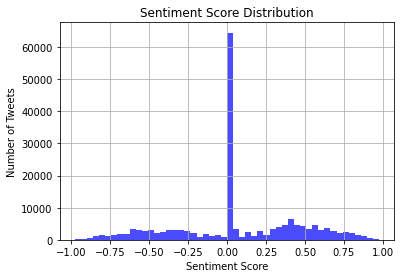

In [11]:
import matplotlib.pyplot as plt

plt.hist(df['sentiment_score'], bins=50, facecolor='blue', alpha=0.7)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()


#### Plot the number of tweets by date and by time of day

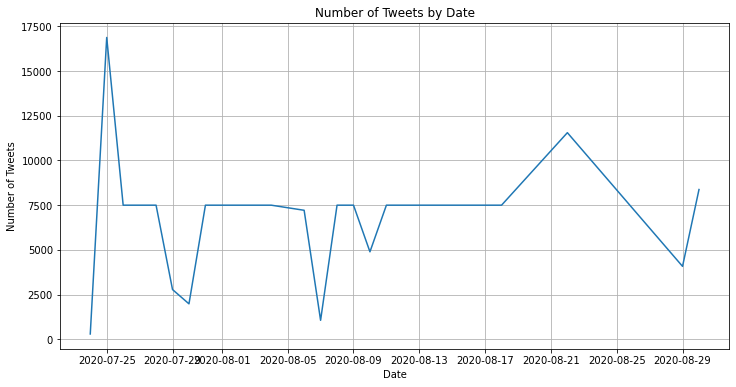

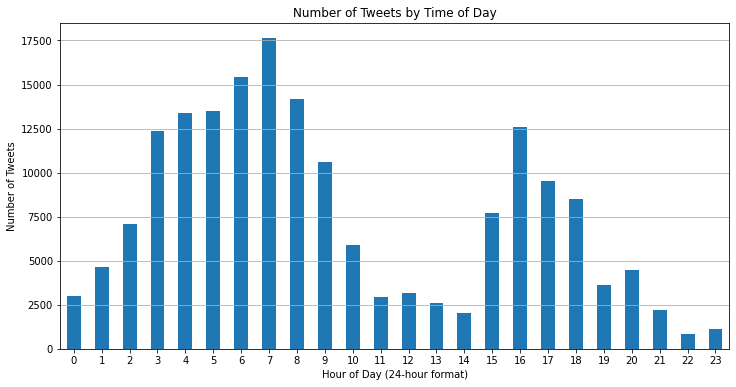

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Plot number of tweets by date
df.groupby(df['date'].dt.date).size().plot(kind='line', figsize=(12, 6))
plt.title('Number of Tweets by Date')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

# Plot number of tweets by time of day
df.groupby(df['date'].dt.hour).size().plot(kind='bar', figsize=(12, 6))
plt.title('Number of Tweets by Time of Day')
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df_covid = pd.read_csv("owid-covid-data-Copy1.csv")

In [24]:
df_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


#### Plot the overlay number of tweets with number of new cases, based on the 2 datasets: covid19_tweets.csv and owid-covid-data.csv

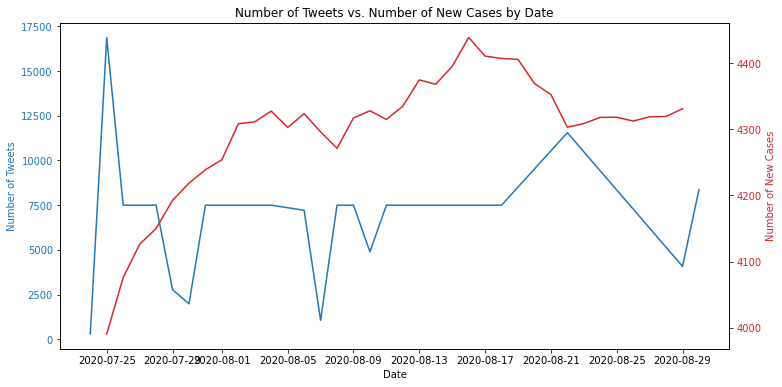

In [26]:
# Convert 'date' columns to datetime format
df_covid['date'] = pd.to_datetime(df_covid['date'])

start_date = '2020-07-25'
end_date = '2020-08-29'

mask = (df_covid['date'] >= start_date) & (df_covid['date'] <= end_date)

# Apply the mask to the DataFrame
selected_rows = df_covid.loc[mask]

# Aggregate number of tweets by date
tweets_by_date = df.groupby(df['date'].dt.date).size()

# Aggregate number of new cases by date (getting mean across all countries)
cases_by_date = selected_rows.groupby(df_covid['date'].dt.date)['new_cases_smoothed'].mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot number of tweets on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Tweets', color='tab:blue')
ax1.plot(tweets_by_date.index, tweets_by_date.values, color='tab:blue', label='Tweets')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the number of new cases
ax2 = ax1.twinx()
ax2.set_ylabel('Number of New Cases', color='tab:red')
ax2.plot(cases_by_date.index, cases_by_date.values, color='tab:red', label='New Cases')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Show the plot
plt.title('Number of Tweets vs. Number of New Cases by Date')
plt.show()


#### plot the overlay number of tweets with stringtency index:

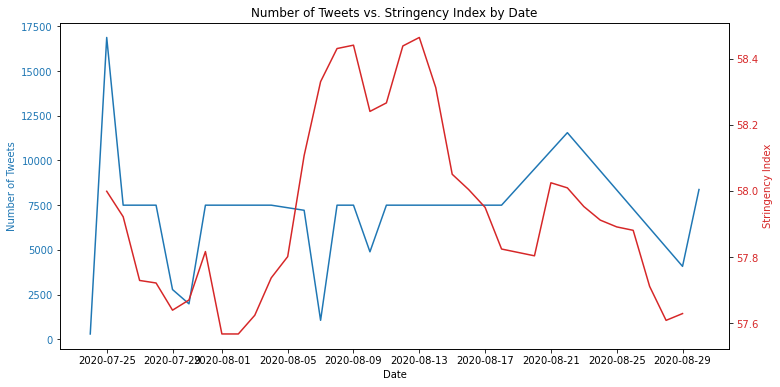

In [27]:
# Aggregate stringency index by date (averaging across all countries)
stringency_by_date = selected_rows.groupby(df_covid['date'].dt.date)['stringency_index'].mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot number of tweets on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Tweets', color='tab:blue')
ax1.plot(tweets_by_date.index, tweets_by_date.values, color='tab:blue', label='Tweets')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the stringency index
ax2 = ax1.twinx()
ax2.set_ylabel('Stringency Index', color='tab:red')
ax2.plot(stringency_by_date.index, stringency_by_date.values, color='tab:red', label='Stringency Index')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Show the plot
plt.title('Number of Tweets vs. Stringency Index by Date')
plt.show()

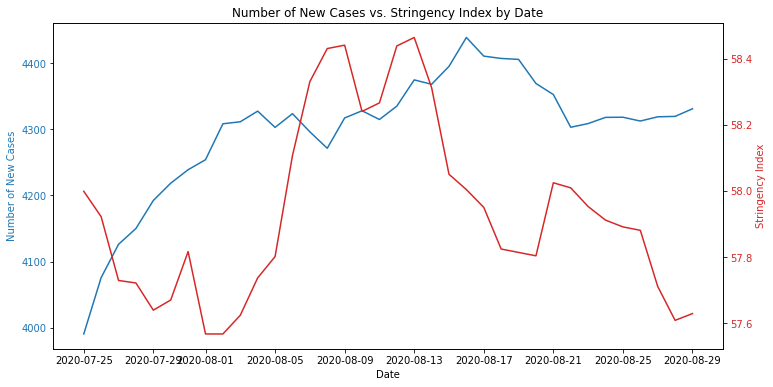

In [29]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot number of tweets on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of New Cases', color='tab:blue')
ax1.plot(cases_by_date.index, cases_by_date.values, color='tab:blue', label='New Cases')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the stringency index
ax2 = ax1.twinx()
ax2.set_ylabel('Stringency Index', color='tab:red')
ax2.plot(stringency_by_date.index, stringency_by_date.values, color='tab:red', label='Stringency Index')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Show the plot
plt.title('Number of New Cases vs. Stringency Index by Date')
plt.show()